# Warmup: drawing lines
## Computer Vision & Pattern Recognition 2020  ( Professor G. Boracchi)
## Lab. Session 1
------------
### Pietro Verzelli




In [1]:
import time
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
from utils import select_points, draw_line

### A simple geometrical construction with 2D homogeneous coordinates

Our goal is to complete the drawing of the isometric projection http://en.wikipedia.org/wiki/Isometric_projection of a cuboid when the points corresponding to a vertex and to three vertices adjacent to it are given as input. The geometrical construction only requires to find lines parallel to other lines, find lines passing through two points, and intersect lines, which is easily achieved in homogeneous coordinates.

We start by selecting poinys `a`, `b`, `c`, `e` (order __DOES__ matter!) in the figure.

In [3]:
# Drawing a Cube

#img = plt.imread("bluecube.jpg")
img = plt.imread("cube.jpeg")
pts = select_points(img, 4)

Click to begin
Select 4 points
Key click to confirm


Let's see what we got

In [4]:
pts

array([[ 52.14888542,  93.48833659],
       [ 12.01626325,  75.74946597],
       [101.59126948,  79.64950136],
       [ 52.77792339,  34.48457546]])

Now we name those points after the figure.
Remember to add the third coordinate, so that they are the *homogeneus coordinates* of the points!

In [5]:
a = np.array([pts[0,0], pts[0,1], 1.])
b = np.array([pts[1,0], pts[1,1], 1.])
c = np.array([pts[2,0], pts[2,1], 1.])
e = np.array([pts[3,0], pts[3,1], 1.])



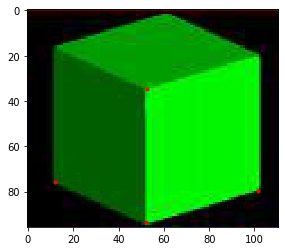

In [6]:
%matplotlib inline

plt.imshow(img)
plt.plot(a[0],a[1], 'r.')
plt.plot(b[0],b[1], 'r.')
plt.plot(c[0],c[1], 'r.')
plt.plot(e[0],e[1], 'r.')
plt.show()


### Finding some lines

Now variables `a`, `b`, `c` and `e` are 3-vectors containing the homogeneous coordinates of the 2D points. We need to find the lines passing through couples of points, using the cross product

In [7]:
from numpy import cross

lab=cross(a,b) #line passing through a and b
lac=cross(a,c) #line passing through a and c
lae=cross(a,e) #line passing through a and e


`lab`, `lac` and `lae` now contain the homogeneous represenation of the three lines `ab`, `ac` and `ae`. We can easily check that the lines actually contain the points by using the incidence relation:

In [8]:
#check
print(lab.dot(a))
print(lab.dot(b))
print(lac.dot(a))
print(lac.dot(c))
print(lae.dot(a))
print(lae.dot(e))

0.0
-4.547473508864641e-13
0.0
0.0
0.0
-4.547473508864641e-13


### Parallelism
We now need to compute the line parallel to ab and passing through c. In order to do this, we create the line at infinity:

In [9]:
linf=np.array([0., 0., 1.])

then, we find the directions of segments by `ab`, `ac` and `ae` intersecting their lines with the line at infinity

In [10]:
dab=cross(lab,linf)
dac=cross(lac,linf)
dae=cross(lae,linf)

`dab`, `dac` and `dae` are __points at the infinity__, which represent __directions__. 
All lines with a given direction pass through the corresponding point at the infinity. 
We can then find the lines containing segments `bd` and `cd`.

In [11]:
lbd=cross(b,dac)
lcd=cross(c,dab)

point `d` is now found by just __intersecting__ `lbd` and `lcd`

In [13]:
d=cross(lbd,lcd)

we normalize `d`'s coordinates so that we can read its cartesian coordinates in `d[0]` and `d[1]`. 
We plot the point with a blue dot.

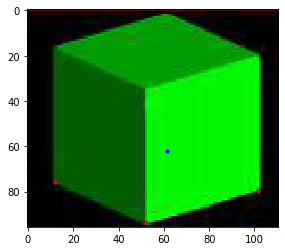

In [14]:
d=d/d[2]
plt.imshow(img)

plt.plot(a[0],a[1],'.r')
plt.plot(b[0],b[1],'.r')
plt.plot(c[0],c[1],'.r')
plt.plot(d[0],d[1],'.b')
plt.show()


We now follow the same procedure to find `f`

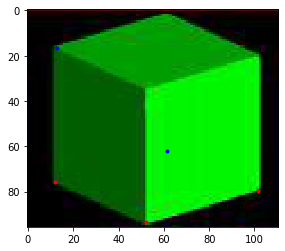

In [15]:

lbf=cross(b,dae)
lef=cross(e,dab)

f=cross(lbf,lef)


f=f/f[2]
plt.imshow(img)

plt.plot(a[0],a[1],'.r')
plt.plot(b[0],b[1],'.r')
plt.plot(c[0],c[1],'.r')
plt.plot(d[0],d[1],'.b')
plt.plot(f[0],f[1],'.b')
plt.show()


and then for `g`

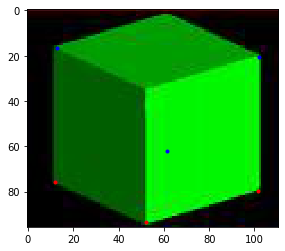

In [16]:
lcg=cross(c,dae)
leg=cross(e,dac)

g=cross(lcg,leg)


g=g/g[2]

plt.imshow(img)
plt.plot(a[0],a[1],'.r')
plt.plot(b[0],b[1],'.r')
plt.plot(c[0],c[1],'.r')
plt.plot(d[0],d[1],'.b')
plt.plot(f[0],f[1],'.b')
plt.plot(g[0],g[1],'.b')
plt.show()

We now have all the elements to compute  the position of `h`

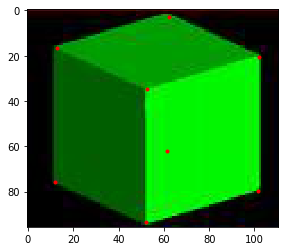

In [17]:
ldh=cross(d,dae)
lfh=cross(f,dac)

h=cross(lfh,ldh)


h=h/h[2]

plt.imshow(img)
plt.plot(a[0],a[1], 'r.')
plt.plot(b[0],b[1], 'r.')
plt.plot(c[0],c[1], 'r.')
plt.plot(d[0],d[1],'.r')
plt.plot(e[0],e[1], 'r.')
plt.plot(f[0], f[1],'.r') 
plt.plot(g[0], g[1],'.r')
plt.plot(h[0], h[1],'.r')
plt.show()